In [43]:
# Import necessary libraries
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [26]:
# os.chdir('/Users/gowtham/Documents/python/SCB/airflow/airflow_docker/')

In [27]:
# Extract the images

images_ = []
labels_ = []

dataset_path = '/Users/gowtham/Documents/python/SCB/airflow/airflow_docker/data'
df = pd.DataFrame(columns=["file_name", "class", "image"])

try:
    # image_size = input("Enter the resizing width and height of the image(e.g., 128, 128): ")
    # # Validate user input for image size
    # image_size = eval(image_size)

    for labels in os.listdir(dataset_path + '/plant_images'):
        if labels != ".DS_Store":
            print(f"Processing class: {labels}")
            class_path = os.path.join(dataset_path + '/plant_images', labels)

            for img in os.listdir(class_path):
                image_path = os.path.join(class_path, img)
                image = cv2.imread(image_path)

                # Resize the image using OpenCV's resize function
                # resized_image = cv2.resize(image, image_size)

                # Temporary list to store data for each image
                image_data = {"file_name": img, "class": labels, "image": image}

                # Append data using pd.concat (recommended approach)
                df = pd.concat([df, pd.DataFrame.from_dict([image_data])], ignore_index=True)

except ValueError:
    print("Invalid input. Please enter image size as width,height (e.g., 128, 128).")
    exit()

# After processing all images, consider saving the DataFrame
if len(df) > 0:
    df.to_csv(dataset_path + "/preprocess_1/plant_image_data.csv", index=False)  # Save DataFrame as CSV


Processing class: potato_early_blight
Processing class: corn_maize_common_rust
Processing class: tomato_bacterial_spot


In [28]:
df.sample(10)

,file_name,class,image
369,RS_Rust 2483.JPG,corn_maize_common_rust,"[[[85, 121, 109], [87, 123, 109], [89, 124, 11..."
354,RS_Rust 2737.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
565,RS_Rust 2689.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
646,fd0edb16-764c-4f1d-8425-d7f67f7564c2___UF.GRC_...,tomato_bacterial_spot,"[[[122, 117, 119], [118, 113, 115], [116, 111,..."
490,RS_Rust 2573.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
688,fa3f0b33-f0a0-4625-b7c9-135bea953d91___GCREC_B...,tomato_bacterial_spot,"[[[111, 113, 123], [121, 123, 133], [118, 120,..."
886,f58a3d12-29e7-4f43-a189-fa80df8f8e72___GCREC_B...,tomato_bacterial_spot,"[[[156, 158, 168], [155, 157, 167], [154, 156,..."
742,fca8f33c-6416-4ef3-91e8-8ea21346f242___GCREC_B...,tomato_bacterial_spot,"[[[152, 148, 159], [152, 148, 159], [151, 147,..."
668,f44c58b0-4d48-4b8b-b812-e472d2737998___GCREC_B...,tomato_bacterial_spot,"[[[118, 120, 131], [112, 114, 125], [112, 114,..."
299,ec9ea109-34c7-48c5-bbac-40a36b21fa05___RS_Earl...,potato_early_blight,"[[[189, 189, 195], [188, 188, 194], [188, 188,..."


In [29]:
df['file_name'].nunique

<bound method IndexOpsMixin.nunique of 0      bc7552e4-3901-41b8-8bef-727eeca4270e___RS_Earl...
1      d8a8d6e5-d82d-4f7c-aac5-183e85549d9b___RS_Earl...
2      d84ba2ee-6ef5-45b7-a15a-b677b99cd3f6___RS_Earl...
3      f164ce92-d109-47ca-9f75-380a7f16155a___RS_Earl...
4      faac446b-34ac-414a-9f0e-148d6ee87bfa___RS_Earl...
                             ...                        
895    f9299ed5-ac75-4849-a8b0-1e1b6c9d3097___GCREC_B...
896    e77c7af3-35cb-496d-bc8b-34bc2344b8fc___GCREC_B...
897    e2941eab-3c1c-43a2-aa6d-5f3926da0568___GCREC_B...
898    ea4ddb4b-216a-4ec2-85bc-06314c7de145___GCREC_B...
899    fc48610a-675f-4fdf-998d-5d877c909550___GCREC_B...
Name: file_name, Length: 900, dtype: object>

In [30]:
df1 = df[['file_name', 'class']]
df1.head()

,file_name,class
0,bc7552e4-3901-41b8-8bef-727eeca4270e___RS_Earl...,potato_early_blight
1,d8a8d6e5-d82d-4f7c-aac5-183e85549d9b___RS_Earl...,potato_early_blight
2,d84ba2ee-6ef5-45b7-a15a-b677b99cd3f6___RS_Earl...,potato_early_blight
3,f164ce92-d109-47ca-9f75-380a7f16155a___RS_Earl...,potato_early_blight
4,faac446b-34ac-414a-9f0e-148d6ee87bfa___RS_Earl...,potato_early_blight


In [31]:
df2 = df[['file_name', 'image']]
df2.head()

,file_name,image
0,bc7552e4-3901-41b8-8bef-727eeca4270e___RS_Earl...,"[[[190, 177, 179], [194, 181, 183], [196, 183,..."
1,d8a8d6e5-d82d-4f7c-aac5-183e85549d9b___RS_Earl...,"[[[145, 138, 141], [163, 156, 159], [160, 153,..."
2,d84ba2ee-6ef5-45b7-a15a-b677b99cd3f6___RS_Earl...,"[[[185, 167, 166], [186, 168, 167], [191, 173,..."
3,f164ce92-d109-47ca-9f75-380a7f16155a___RS_Earl...,"[[[201, 189, 189], [208, 196, 196], [214, 202,..."
4,faac446b-34ac-414a-9f0e-148d6ee87bfa___RS_Earl...,"[[[180, 162, 163], [179, 161, 162], [178, 160,..."


In [32]:
df = pd.merge(df1, df2, on='file_name')
df.sample(10)

,file_name,class,image
97,ea403e5a-34b3-4b06-a94d-65ad2e78831f___RS_Earl...,potato_early_blight,"[[[192, 179, 181], [187, 174, 176], [182, 169,..."
628,f3254462-bebf-48bc-84ce-93f88fddefe4___GCREC_B...,tomato_bacterial_spot,"[[[165, 164, 166], [160, 159, 161], [155, 154,..."
6,c4dd703b-1d4c-4e4c-8064-0e1d743c47ae___RS_Earl...,potato_early_blight,"[[[138, 123, 127], [131, 116, 120], [142, 127,..."
563,RS_Rust 2662.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
571,RS_Rust 2501.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
651,fd3a25ef-50f2-4ca2-a20d-d0a99bcbae13___GCREC_B...,tomato_bacterial_spot,"[[[164, 163, 165], [162, 161, 163], [162, 161,..."
499,RS_Rust 2749.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
415,RS_Rust 2751.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
239,be5f03e6-810f-4f22-9e5a-37a66826f7e5___RS_Earl...,potato_early_blight,"[[[134, 119, 123], [162, 147, 151], [178, 163,..."
478,RS_Rust 2606.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [33]:
len(df)

900

In [55]:
df.isnull().sum()

file_name    0
class        0
image        0
dtype: int64

In [57]:
for col in df.columns:
    if df[col].isnull().any():
        print(f"Feature: {col} has null values")


In [35]:
# No missing values
# Vizualizing the images

def sample_img(df_val,n):
    df_val = df_val.sample(n)
    plt.figure(figsize=(20,20))
    for i,j in enumerate(df_val.iterrows()):
        plt.subplot(1,n,i+1)
        plt.imshow(j[1]['image'])
        plt.title("{}".format(j[1]['class'])) 

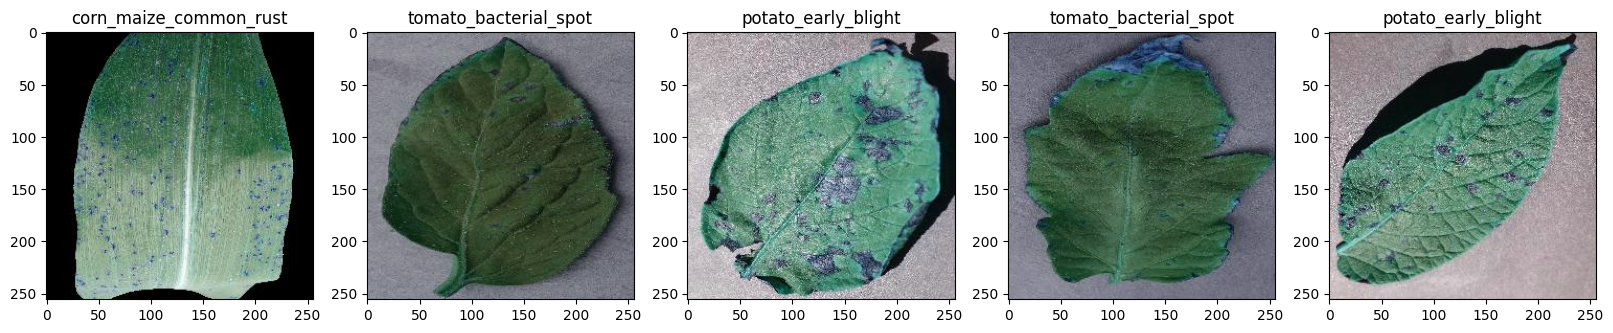

In [36]:
sample_img(df, 5)

In [37]:
# splitting dataset to train and test
from sklearn.model_selection import StratifiedShuffleSplit

# Define the class label column name (replace with your actual column name)
class_label = "class"

# Create a StratifiedShuffleSplit object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)  # Adjust test_size as needed

# Split the data into train and test sets (assuming your data is in a pandas DataFrame called df)
for train_index, test_index in sss.split(df, df[class_label]):
    train_dataset = df.iloc[train_index]
    test_dataset = df.iloc[test_index]

In [38]:
# Resizing the image suitable for model use
len(train_dataset)

720

In [58]:
# Reshaping train dataset suitable for the model
# For reshaping the image, we can do it if it is in the form of an array or liost

import cv2

image_list = []
resized_image_size = (128, 128)     # The image size can be dependent on the model
image = train_dataset['image']
label = train_dataset['class']

for i, j in enumerate(image):
    img = cv2.resize(j, resized_image_size)      
    image_list.append(img)

In [40]:
len(image_list)

720

In [41]:
# OpenCV reads images in BGR format by default when using cv2.imread()
# Few libraries like matplotlib and PIL expects image in 
image_rgb = []
for img in image_list:
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image_rgb.append(image)

In [42]:
len(image_rgb)

720

In [44]:
# Normalization

# converting the list to array
image_array = np.array(image_rgb)
image_norm = (image_array/255).astype('float32')

print(image_norm.shape)
print(image_norm.max(), image_norm.min())


(720, 128, 128, 3)
1.0 0.0


In [61]:
df_norm = pd.DataFrame({'image_preprocess_1': image_norm})
df_norm.head()

ValueError: Per-column arrays must each be 1-dimensional

In [46]:
# Standardization

mean = np.mean(image_array, axis=(0,1,2), keepdims=True)
std = np.std(image_array, axis=(0,1,2), keepdims=True)
image_std = (image_array - mean) / std

print(image_std.shape)
print(image_std.max(), image_std.min())

(720, 128, 128, 3)
2.95130366251421 -2.027456239178381


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5808326040662353..1.1950334461731027].


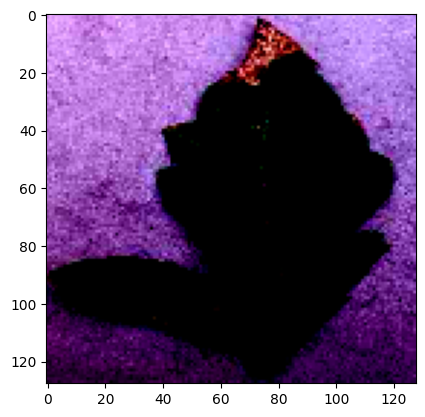

In [47]:
# Plotting a sample image befor cropping

image_to_plot = image_std[0]
plt.imshow(image_to_plot)
plt.show()


720


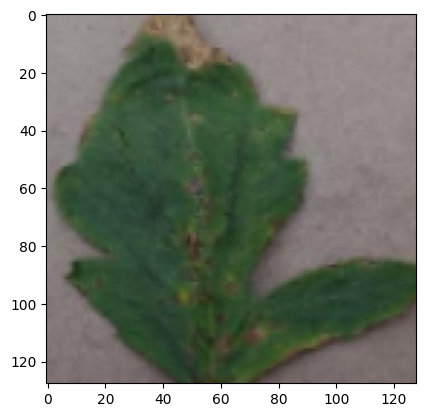

In [50]:
import imgaug as ia
from imgaug import augmenters as iaa

# Define augmentation sequence (replace with your desired transformations)
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Flip horizontally with 50% probability
    iaa.Rotate((-10, 10)),  # Rotate between -10 and 10 degrees
    iaa.Crop(percent=(0.0, 0.1))  # Randomly crop up to 10% of the image
])

# Load your image array (assuming your array is called "images")
original_images = image_array

# Augment the images
augmented_images = seq(images=original_images)
print(len(augmented_images))
img_to_plot = augmented_images[0]
plt.imshow(img_to_plot)
plt.show()


# Save the augmented images (replace "augmented_images.npy" with your desired filename)
# np.save("augmented_images.npy", augmented_images)


In [ ]:
# Define augmentation sequence (replace with your desired transformations)
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Flip horizontally with 50% probability
    iaa.Rotate((-10, 10)),  # Rotate between -10 and 10 degrees
    iaa.Crop(percent=(0.0, 0.1))  # Randomly crop up to 10% of the image
])

# Load your image array (assuming your array is called "images") and labels (assuming in a list called "labels")
original_images = images
original_labels = labels

# Augment the images
augmented_images = seq(images=original_images)

# Append augmented images and labels to originals (assuming labels have the same order as images)
augmented_images = np.concatenate((original_images, augmented_images))
augmented_labels = labels + labels.copy()  # Duplicate labels for augmented images

# Save the augmented data (replace with your desired filenames)
np.save("augmented_images.npy", augmented_images)
np.save("augmented_labels.npy", augmented_labels)


In [ ]:
# Augmentation: Rotation, Translation, Shearing, Zooming, Flipping, Cropping, Color Jittering
# Using Augmentor library or similar
import Augmentor

p = Augmentor.Pipeline()
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.zoom_random(probability=0.5, percentage_area=0.8)
p.flip_left_right(probability=0.5)
p.sample(1)